# Bank Marketing Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter('ignore')

## Step 1 : Data extraction and Understanding

### Reading a dataset

In [3]:
df = pd.read_csv ( "bank-marketing.csv" )
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [6]:
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

> so , we can conclude that there are no null values in a dataset

### Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [7]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


> we can notice that  min value is -1 , mean is 40 , median and 75% of the values are -1 . so from this we can conclude that   -1 corresponds to the previous campaign absence . so we can exclude those records for our prediction .

## Step 2 : Data cleaning

### Describe the pdays column again, this time limiting yourself to the relevant values of pdays. 


### How different are the mean and the median values?

In [8]:
len(df[df["pdays"]<0])

36954

In [9]:
df.drop( df[df["pdays"]<0].index ,  inplace = True )

In [10]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes


In [11]:
len(df["pdays"]>0)

8257

In [12]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000
mean,40.953131,57564.006298,1556.880102,14.289209,260.118687,2.056195,224.577692,3.177546
std,11.425180,31791.407761,3060.593186,7.919176,235.208105,1.561169,115.344035,4.560820
min,18.000000,0.000000,-1884.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,33.000000,20000.000000,168.000000,7.000000,113.000000,1.000000,133.000000,1.000000
50%,38.000000,60000.000000,602.000000,14.000000,193.000000,2.000000,194.000000,2.000000
75%,48.000000,70000.000000,1743.000000,20.000000,324.000000,2.000000,327.000000,4.000000
max,93.000000,120000.000000,81204.000000,31.000000,2219.000000,16.000000,871.000000,275.000000


> since we had removed the customers who didnt attend to previous campaign  mean and median has been changed . 

### Plot a horizontal bar graph with the median values of balance for each education level value. 

### Which group has the highest median?

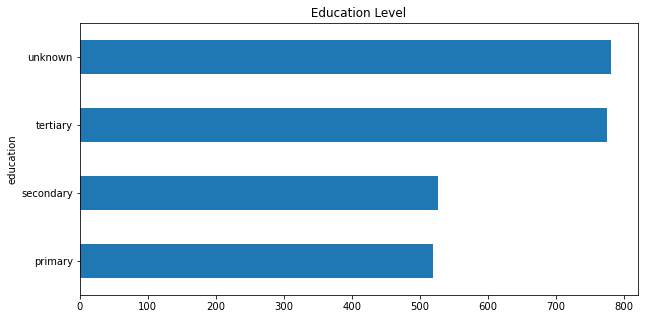

In [13]:
plt.figure( figsize = (10,5) )
df.groupby(['education'])['balance'].median().plot.barh();
plt.title ( " Education Level ")
plt.show()

> we can notice that tertiary education has highest median for balance . 

### Make a box plot for pdays. Do you see any outliers?

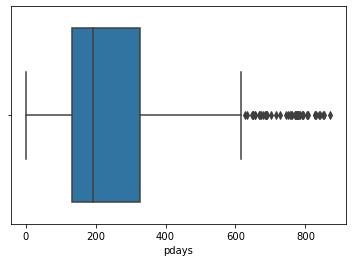

In [14]:
sns.boxplot( df["pdays"] );                                           

In [15]:
cat_col = []
num_col = []
for i in df.columns:
    if df[i].dtype=='O':
        cat_col.append(i)
    else:
        num_col.append(i)

> yes we can notice the outliers in pdays column

#### The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target 

#### variable is “response”.

### Bi-variate analysis

### -            Convert the response variable to a convenient form


In [16]:
df.replace( { "response" :{ "yes" : 1, "no" : 0 } } , inplace = True)

In [17]:
df["response"].value_counts()

0    6352
1    1905
Name: response, dtype: int64

### -   Make suitable plots for associations with numerical features and categorical features’

> Extracting numerical and categorical features

In [18]:
print("Columns" , df.columns)
print()
print("categorical_columns" , cat_col)
print()
print("Numerical_columns" , num_col)

Columns Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

categorical_columns ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'response']

Numerical_columns ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


> since our Target variable is response , we will plot against response

## Step 3 : Exploratory Data analysis

### Plotting Response Vs Categorical_columns

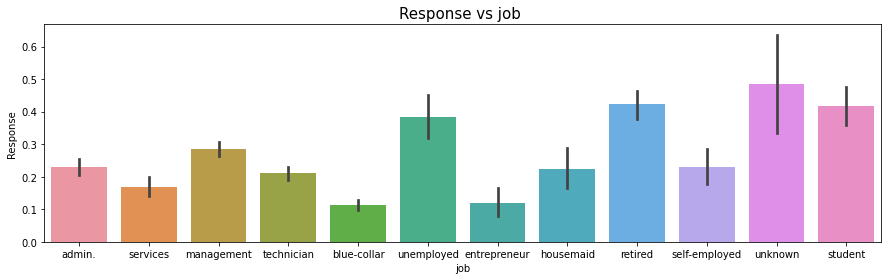

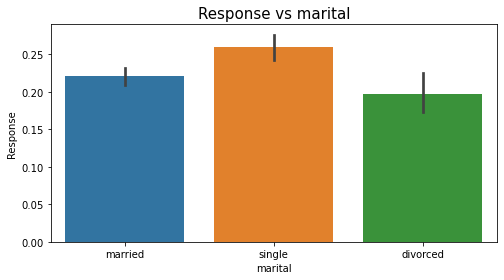

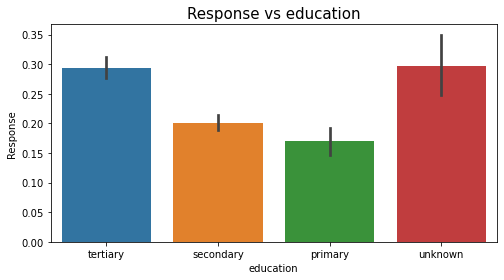

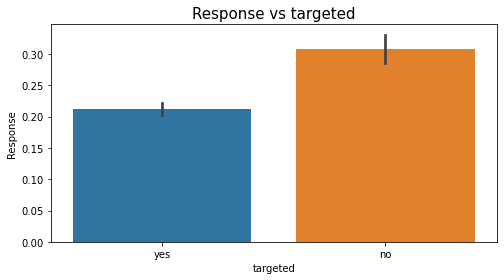

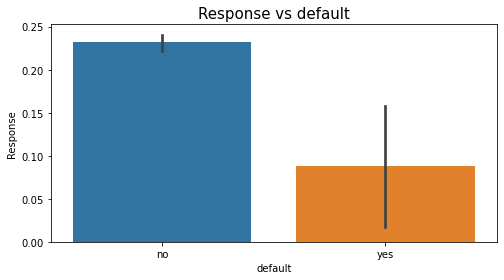

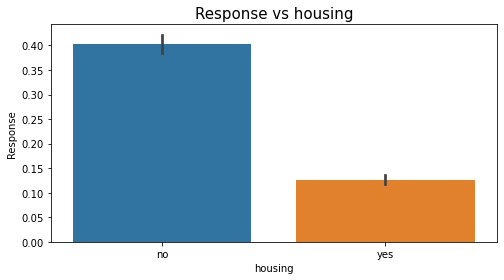

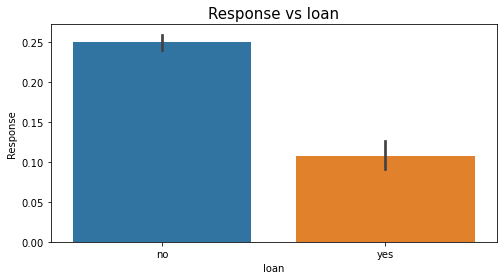

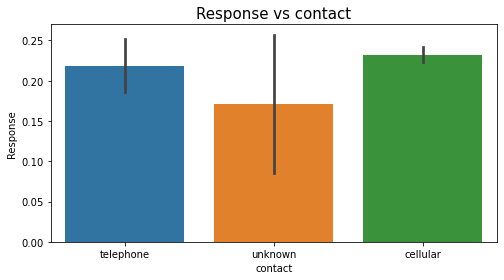

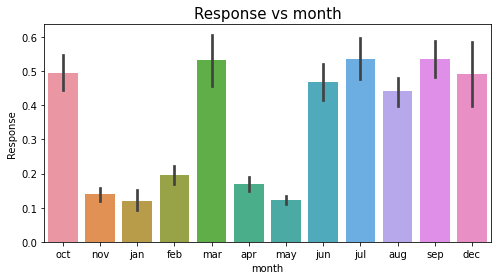

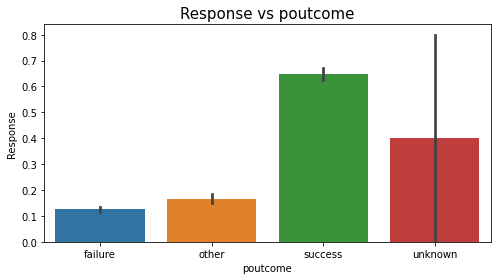

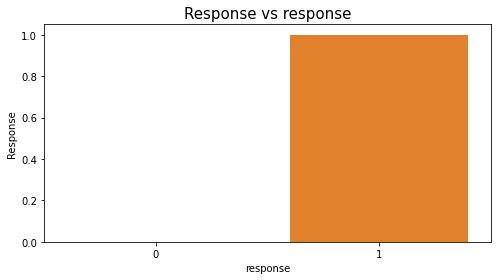

In [19]:
plt.figure(figsize=(15,4))
sns.barplot( df["job"] , df["response"] )
plt.title("Response vs job ",fontsize=15)
plt.xlabel("job",fontsize=10)
plt.ylabel("Response",fontsize=10)
plt.show()


for i in cat_col[1:]:
    plt.figure(figsize=(8,4))
    sns.barplot( df[i] ,df["response"] )
    plt.title("Response vs "+i,fontsize=15)
    plt.xlabel(i,fontsize=10)
    plt.ylabel("Response",fontsize=10)
    plt.show()
    

### Some insights

- Students and Retired people are  highly responding to the campaign .
- People who are single are showing more response to campaign than married and divorced one .
- People who are educating in tertiary are responding much to campaign.
- People who didn't take the loan from the bank are showing more response to the campaign .
- People whose contact is cellular are  responding much to the campaign .
- We can notice that responses are high in march , july and september months .

### Plotting Response Vs Numerical_columns

<Figure size 576x288 with 0 Axes>

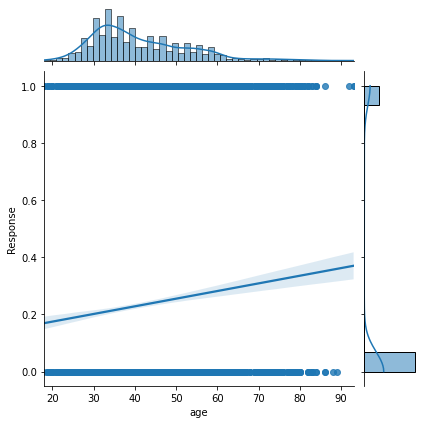

<Figure size 576x288 with 0 Axes>

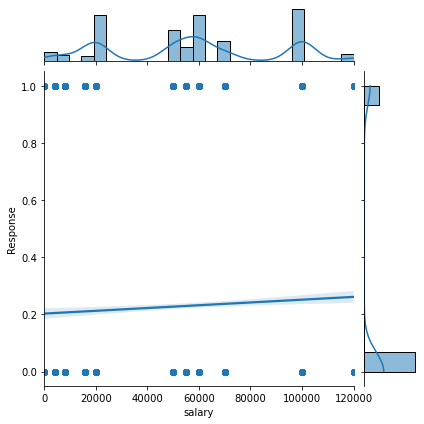

<Figure size 576x288 with 0 Axes>

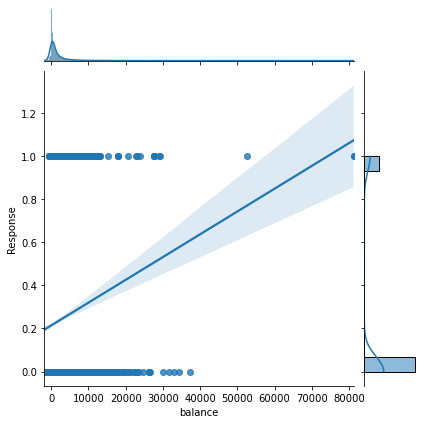

<Figure size 576x288 with 0 Axes>

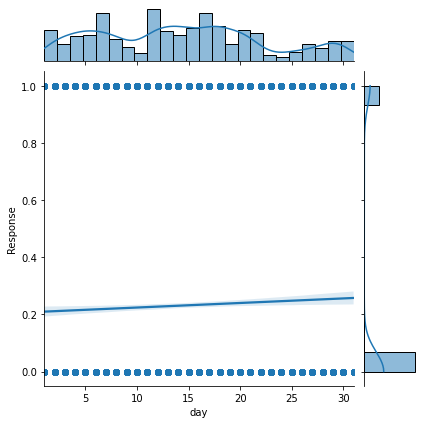

<Figure size 576x288 with 0 Axes>

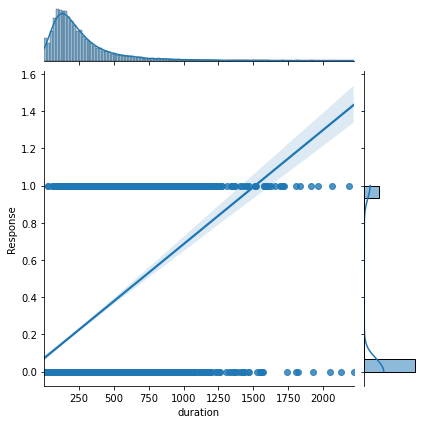

<Figure size 576x288 with 0 Axes>

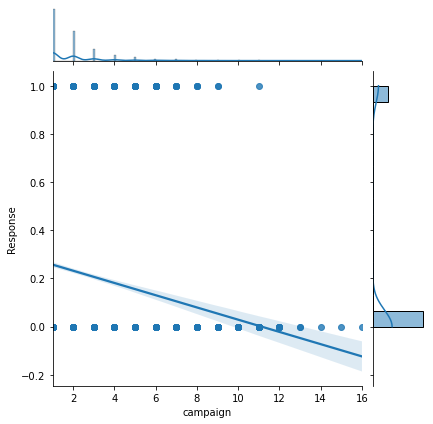

<Figure size 576x288 with 0 Axes>

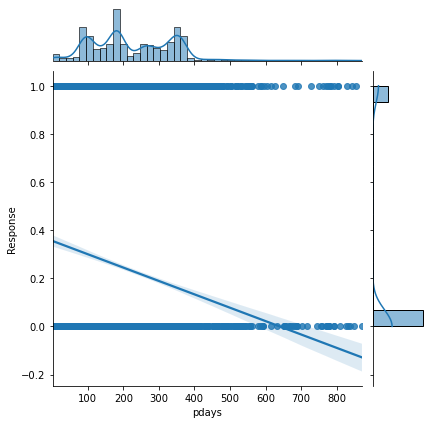

In [20]:
for i in num_col[:-1]:
    plt.figure(figsize=(8,4))
    sns.jointplot( df[i] , df["response"] , kind = "reg" );
    plt.xlabel(i,fontsize=10)
    plt.ylabel("Response",fontsize=10)
    plt.show() 

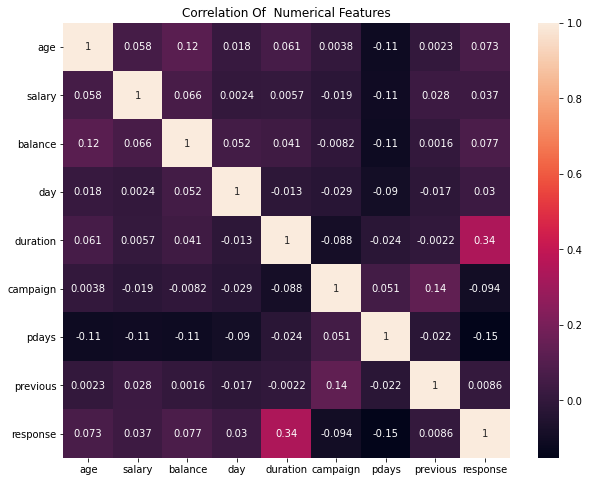

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr() , annot=True  );
plt.title("Correlation Of  Numerical Features")
plt.show()



### Are pdays and poutcome associated with the target? 

> I think pdays column  is not associated with the target variable . But poutcome is associated with target variable . 

### some insights

- Duration is highly correlated with the target variable called "response" .
- Age and  Balance are also having positive correlation with Target variable .
- Campaign has negative correlation with the Target variable .

### Before the predictive modeling part, make sure to perform –
- The necessary transformations for the categorical variables and the numeric variables
- Handle variables corresponding to the previous campaign
- Train test split

In [22]:
df[num_col].head()

,age,salary,balance,day,duration,campaign,pdays,previous
24060,33,50000,882,21,39,1,151,3
24062,42,50000,-247,21,519,1,166,1
24064,33,70000,3444,21,144,1,91,4
24072,36,100000,2415,22,73,1,86,4
24077,36,100000,0,23,140,1,143,3


In [23]:
df[cat_col].head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,response
24060,admin.,married,tertiary,yes,no,no,no,telephone,oct,failure,0
24062,admin.,single,secondary,yes,no,yes,yes,telephone,oct,other,1
24064,services,married,secondary,yes,no,yes,no,telephone,oct,failure,1
24072,management,married,tertiary,yes,no,yes,no,telephone,oct,other,0
24077,management,married,tertiary,yes,no,yes,no,telephone,oct,failure,1


In [24]:
from sklearn.preprocessing import LabelEncoder
df1 = df[cat_col].apply(LabelEncoder().fit_transform)

In [25]:
df1.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,response
24060,0,1,2,1,0,0,0,1,10,0,0
24062,0,2,1,1,0,1,1,1,10,1,1
24064,7,1,1,1,0,1,0,1,10,0,1
24072,4,1,2,1,0,1,0,1,10,1,0
24077,4,1,2,1,0,1,0,1,10,0,1


In [26]:
df2 = df1.join(df[num_col])
df2.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,response,age,salary,balance,day,duration,campaign,pdays,previous
24060,0,1,2,1,0,0,0,1,10,0,0,33,50000,882,21,39,1,151,3
24062,0,2,1,1,0,1,1,1,10,1,1,42,50000,-247,21,519,1,166,1
24064,7,1,1,1,0,1,0,1,10,0,1,33,70000,3444,21,144,1,91,4
24072,4,1,2,1,0,1,0,1,10,1,0,36,100000,2415,22,73,1,86,4
24077,4,1,2,1,0,1,0,1,10,0,1,36,100000,0,23,140,1,143,3


### Predictive model 1: Logistic regression


In [27]:
X = df2.drop("response" ,  axis = 1 )
X.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3


In [28]:
y = df2["response"]
y.head()

24060    0
24062    1
24064    1
24072    0
24077    1
Name: response, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

### Step 4 :  Modelling

In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

model = lr.fit(X_train, y_train )

model

LogisticRegression()

### Step 5  : Model Evaluation

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score , precision_score , recall_score


In [32]:
y_pred = lr.predict(X_test)

In [33]:
print("Classification Report :" )
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Classification Report :
              precision    recall  f1-score   support

           0       0.80      0.97      0.87      1896
           1       0.65      0.21      0.32       582

    accuracy                           0.79      2478
   macro avg       0.73      0.59      0.60      2478
weighted avg       0.76      0.79      0.74      2478

[[1832   64]
 [ 461  121]]


In [34]:
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Precison : ",precision_score(y_test,y_pred))
print("F1-score : ",f1_score(y_test,y_pred))

Accuracy :  0.788135593220339
Precison :  0.654054054054054
F1-score :  0.3155149934810952


### Which features are the most important from your model?
- Housing, loan, default, poutcome are important feature from the model - (logistic regression )

### Predictive model 2: Random Forest

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

clf = RandomForestClassifier()

> GridSearchCV method for model performance

In [36]:
grid = { 
    'n_estimators': [1, 50],
    'max_depth' : [1,2,3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [37]:
from sklearn.model_selection import GridSearchCV
a = GridSearchCV(estimator=clf, param_grid = grid, cv= 10 , n_jobs=-1)
a.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [1, 50]})

In [38]:
a.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 50}

In [39]:
# Training the Algorithm.
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier( criterion = "gini" , n_estimators = 50, max_depth = 8 , random_state=0)  
clf.fit(X_train, y_train) 
y_pred=clf.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score , precision_score , recall_score

print("confusion matrix\n")
print(confusion_matrix(y_test,y_pred))
print()
print("classification report\n")
print(classification_report(y_test,y_pred))  

confusion matrix

[[1216   68]
 [ 197  171]]

classification report

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1284
           1       0.72      0.46      0.56       368

    accuracy                           0.84      1652
   macro avg       0.79      0.71      0.73      1652
weighted avg       0.83      0.84      0.83      1652



In [41]:
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Precison : ",precision_score(y_test,y_pred))
print("F1-score : ",f1_score(y_test,y_pred))

Accuracy :  0.839588377723971
Precison :  0.7154811715481172
F1-score :  0.5634266886326195


### Which features are the most important from your model?
- Housing, month, pdays, poutcome, duration are important features from the model  -  ( RANDOM FOREST ).

> The  goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target 
variable is “response”.

### Compare the performance of the Random Forest and the logistic model –

> - Comparing  ACCURACY and PRECISON :

> - LOGISTIC REGRESSION - 79%  and  65%

> - RANDOM FOREST       - 84%  and  75%

> - So Random Forest Model is the best model for Preding the Responce for the Campaign .

## ------------------------------- THANKYOU ----------------------------